In [190]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load Data

In [191]:
df=pd.read_csv('train.csv',delimiter=',') 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
Embarked_map = {'S':0, 'C': 1, 'Q': 2}
sex_map = {'male': 1, 'female': 0}

df['Embarked'] = df['Embarked'].map(Embarked_map)
df['Sex'] = df['Sex'].map(sex_map)

df = df.drop(columns="PassengerId")
df = df.drop(columns="Name")
df = df.drop(columns="Ticket")

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['Age']] = imputer.fit_transform(df[['Age']])

df['Cabin'] = df['Cabin'].replace(np.nan, 'ZZ', regex=True)
df['Embarked'] = df['Embarked'].replace(np.nan, 3, regex=True)

df['Cabin']=df['Cabin'].str.slice(0,1)

In [193]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,Z,0.0
1,1,1,0,38.0,1,0,71.2833,C,1.0
2,1,3,0,26.0,0,0,7.9250,Z,0.0
3,1,1,0,35.0,1,0,53.1000,C,0.0
4,0,3,1,35.0,0,0,8.0500,Z,0.0


In [194]:
pd.isnull(df).sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [195]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.368126
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.647601
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


# Data Exploration

## Survived

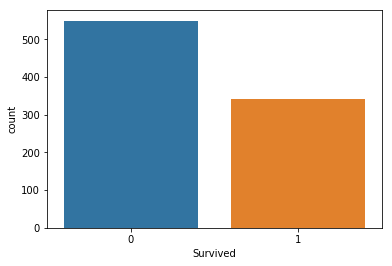

In [196]:
sb.countplot(df["Survived"])

In [197]:
print("Number of Survived=0 and Survived=1") 
print(df["Survived"].value_counts())

Number of Survived=0 and Survived=1
0    549
1    342
Name: Survived, dtype: int64


### There are fewer passengers who survived than not survived.

## Sex

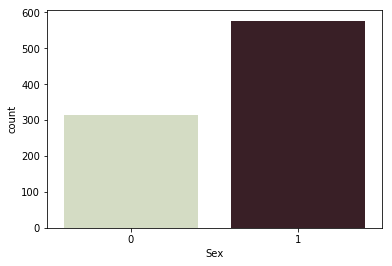

In [198]:
sb.countplot(x="Sex", data=df, palette="ch:0.6")

In [199]:
print(df["Sex"].value_counts())

1    577
0    314
Name: Sex, dtype: int64


C:\Users\chiun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


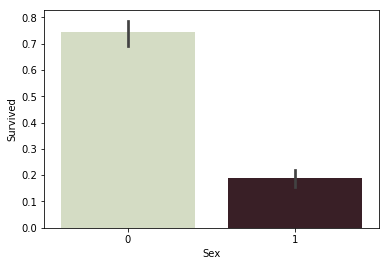

In [200]:
sb.barplot(x="Sex", y="Survived", data=df, palette="ch:0.6")

In [201]:
print("Survival rate:")
print("Female: ", df['Survived'][df['Sex'] == 0].value_counts(normalize=True)[1])
print("Male: ", df['Survived'][df['Sex'] == 1].value_counts(normalize=True)[1])

Survival rate:
Female:  0.7420382165605095
Male:  0.18890814558058924


### There were more men who were onboard but their survival rate is much lower than that of women.

## Pclass

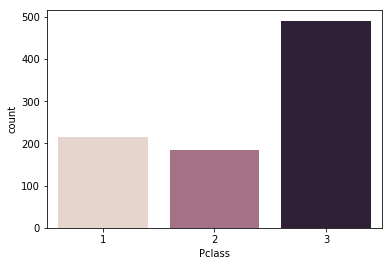

In [202]:
sb.countplot(x="Pclass", data=df, palette="ch:0.1")

In [203]:
print(df["Pclass"].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


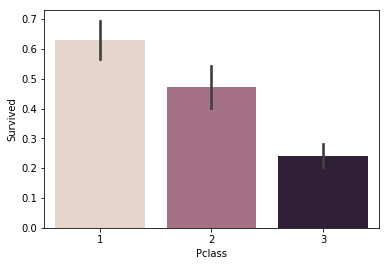

In [204]:
sb.barplot(x="Pclass", y="Survived", data=df, palette="ch:0.1")

In [205]:
print("Survival rate:")
print("Pclass=1: ", df['Survived'][df['Pclass'] == 1].value_counts(normalize=True)[1])
print("Pclass=2: ", df['Survived'][df['Pclass'] == 2].value_counts(normalize=True)[1])
print("Pclass=3: ", df['Survived'][df['Pclass'] == 3].value_counts(normalize=True)[1])

Survival rate:
Pclass=1:  0.6296296296296297
Pclass=2:  0.47282608695652173
Pclass=3:  0.24236252545824846


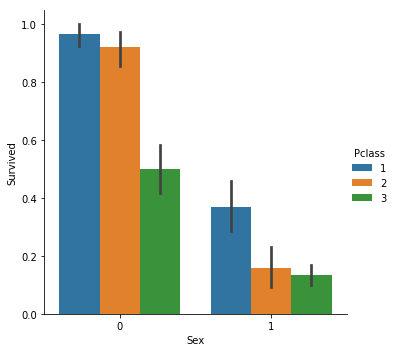

In [206]:
sb.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);

### The survival rate for passesngers in the first class is the highest, while that of third class is the lowest.

## Age

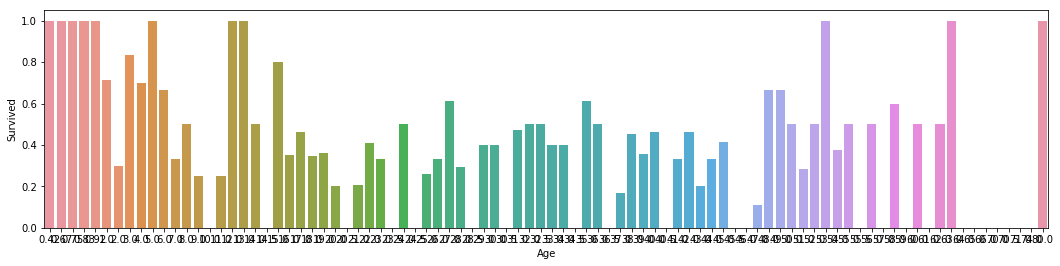

In [207]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
sb.barplot(x='Age', y='Survived', data=df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean())

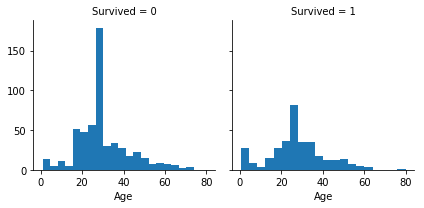

In [208]:
sb.FacetGrid(df, col='Survived').map(plt.hist, 'Age', bins=20)

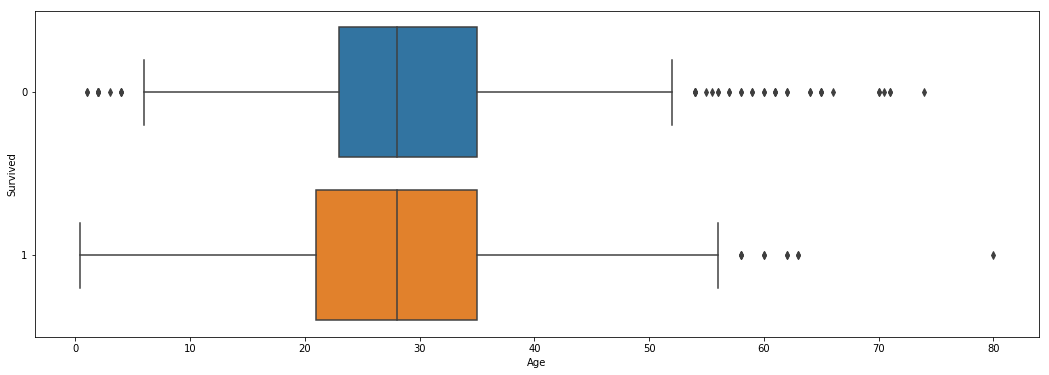

In [209]:
jointDF = pd.concat([df["Age"], df["Survived"]], axis = 1)
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "Age", y = "Survived", data = jointDF, orient = "h")

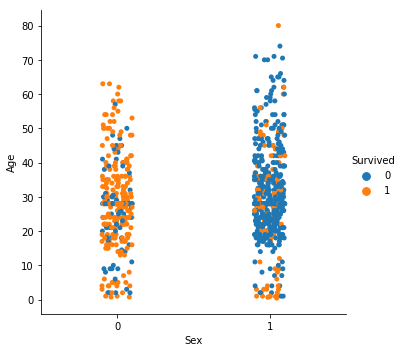

In [210]:
sb.catplot(x = "Sex", y = "Age", hue= "Survived",data = df);

## SibSp

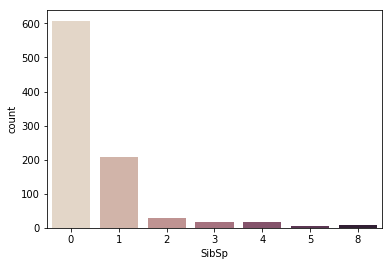

In [211]:
sb.countplot(x="SibSp", data=df, palette="ch:0.2")

In [212]:
print(df["SibSp"].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


### Most passengers did not have any siblings nor spouse onboard.

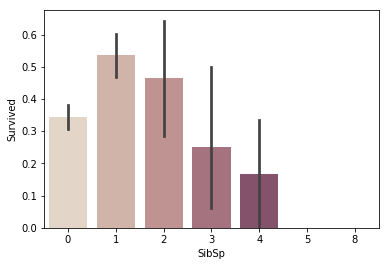

In [213]:
sb.barplot(x="SibSp", y="Survived", data=df, palette="ch:0.2")

In [214]:
print("Survival rate:")
print("SibSp=1: ", df['Survived'][df['SibSp'] == 1].value_counts(normalize=True)[1])
print("SibSp=2: ", df['Survived'][df['SibSp'] == 2].value_counts(normalize=True)[1])
print("Sibsp=3: ", df['Survived'][df['SibSp'] == 3].value_counts(normalize=True)[1])
print("Sibsp=4: ", df['Survived'][df['SibSp'] == 4].value_counts(normalize=True)[1])

Survival rate:
SibSp=1:  0.5358851674641149
SibSp=2:  0.4642857142857143
Sibsp=3:  0.25
Sibsp=4:  0.16666666666666666


## Parch

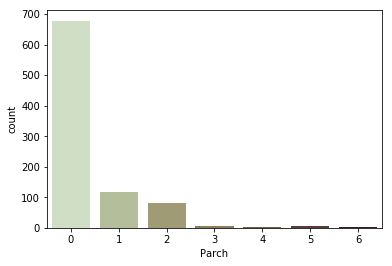

In [215]:
sb.countplot(x="Parch", data=df, palette="ch:0.7")

In [216]:
print(df["Parch"].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


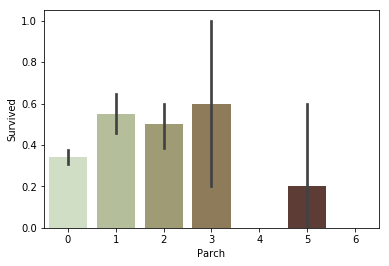

In [217]:
sb.barplot(x="Parch", y="Survived", data=df, palette="ch:0.7")

In [218]:
print("Survival rate:")
print("Parch=0: ", df['Survived'][df['Parch'] == 0].value_counts(normalize=True)[1])
print("Parch=1: ", df['Survived'][df['Parch'] == 1].value_counts(normalize=True)[1])
print("Parch=2: ", df['Survived'][df['Parch'] == 2].value_counts(normalize=True)[1])
print("Parch=3: ", df['Survived'][df['Parch'] == 3].value_counts(normalize=True)[1])
print("Parch=5: ", df['Survived'][df['Parch'] == 5].value_counts(normalize=True)[1])

Survival rate:
Parch=0:  0.34365781710914456
Parch=1:  0.5508474576271186
Parch=2:  0.5
Parch=3:  0.6
Parch=5:  0.2


## Fare

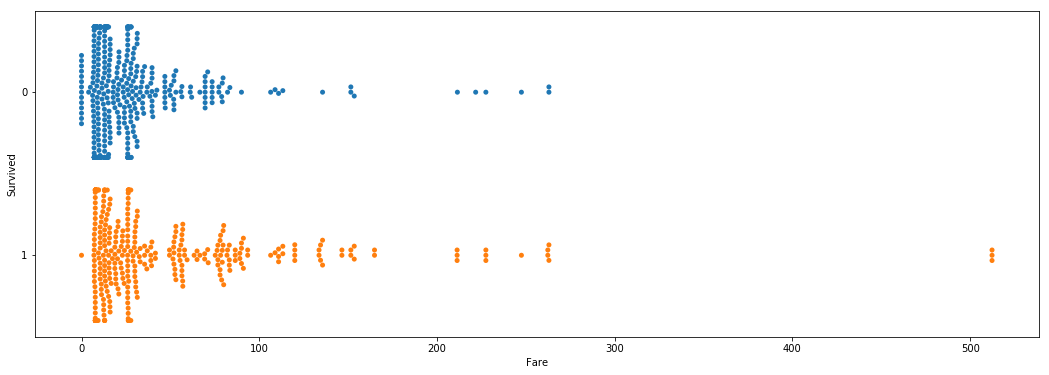

In [219]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "Fare", y = "Survived", data = df, orient = "h")

## Cabin

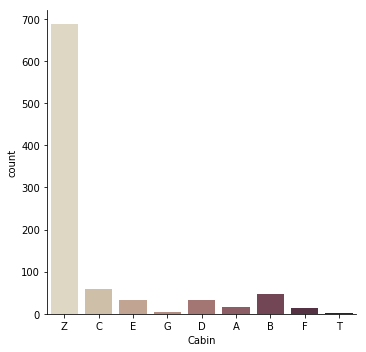

In [220]:
sb.catplot(x='Cabin', kind='count', palette="ch:0.35", data=df)

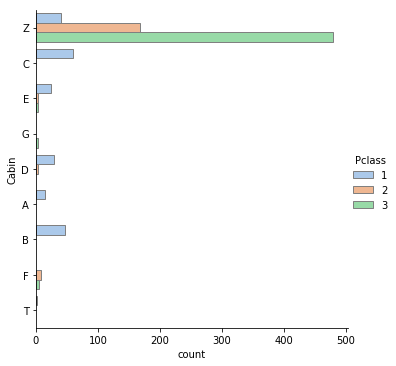

In [221]:
sb.catplot(y="Cabin", hue="Pclass", kind="count", palette="pastel", edgecolor='0.5', data=df)

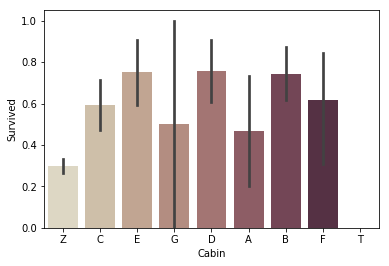

In [222]:
sb.barplot(x="Cabin", y="Survived", data=df, palette="ch:0.35")

In [223]:
print("Survival rate:")
print("Cabin A: ", df['Survived'][df['Cabin'] == 'A'].value_counts(normalize=True)[1])
print("Cabin B: ", df['Survived'][df['Cabin'] == 'B'].value_counts(normalize=True)[1])
print("Cabin C: ", df['Survived'][df['Cabin'] == 'C'].value_counts(normalize=True)[1])
print("Cabin D: ", df['Survived'][df['Cabin'] == 'D'].value_counts(normalize=True)[1])
print("Cabin E: ", df['Survived'][df['Cabin'] == 'E'].value_counts(normalize=True)[1])
print("Cabin F: ", df['Survived'][df['Cabin'] == 'F'].value_counts(normalize=True)[1])
print("Cabin G: ", df['Survived'][df['Cabin'] == 'G'].value_counts(normalize=True)[1])
print("No Cabin: ", df['Survived'][df['Cabin'] == 'Z'].value_counts(normalize=True)[1])

Survival rate:
Cabin A:  0.4666666666666667
Cabin B:  0.7446808510638298
Cabin C:  0.5932203389830508
Cabin D:  0.7575757575757576
Cabin E:  0.75
Cabin F:  0.6153846153846154
Cabin G:  0.5
No Cabin:  0.29985443959243085


### Deck B, D and E have the highest survival rate while A has the lowest.

## Embarked

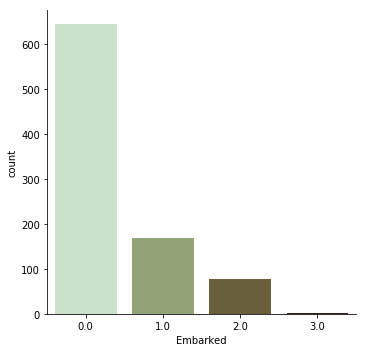

In [224]:
sb.catplot(x='Embarked', kind='count', palette="ch:0.9", data=df)

In [225]:
print(df["Embarked"].value_counts())

0.0    644
1.0    168
2.0     77
3.0      2
Name: Embarked, dtype: int64


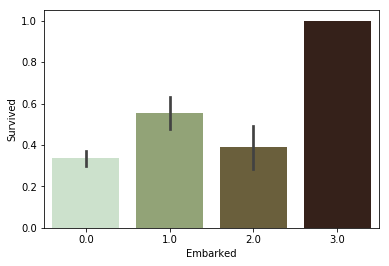

In [226]:
sb.barplot(x="Embarked", y="Survived", data=df, palette="ch:0.9")

In [227]:
print("Survival rate:")
print("Embarked=0: ", df['Survived'][df['Embarked'] == 0].value_counts(normalize=True)[1])
print("Embarked=1: ", df['Survived'][df['Embarked'] == 1].value_counts(normalize=True)[1])
print("Embarked=2: ", df['Survived'][df['Embarked'] == 2].value_counts(normalize=True)[1])
print("Embarked=3: ", df['Survived'][df['Embarked'] == 3].value_counts(normalize=True)[1])

Survival rate:
Embarked=0:  0.33695652173913043
Embarked=1:  0.5535714285714286
Embarked=2:  0.38961038961038963
Embarked=3:  1.0
